# Technical Notebook

In [1]:
import pandas as pd
import numpy as np 
import seaborn as SNS
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Target and Features Datasets

In [2]:
# importing dataset with target variable. LE = life expectancy
LE = pd.read_csv('./data/lifeExpectancyAtBirth.csv')

# importing relevant features datasets

air_pollution = pd.read_csv('./data/airPollutionDeathRate.csv')
etoh_abuse = pd.read_csv('./data/alcoholSubstanceAbuse.csv')
birth_skilled_persons = pd.read_csv('./data/birthAttendedBySkilledPersonal.csv')
suicide_rates = pd.read_csv('./data/crudeSuicideRates.csv')
healthy_le = pd.read_csv('./data/HALElifeExpectancyAtBirth.csv')
malaria_incidence = pd.read_csv('./data/incedenceOfMalaria.csv')
TB_incidence = pd.read_csv('./data/incedenceOfTuberculosis.csv')
infant_MR = pd.read_csv('./data/infantMortalityRate.csv')
MMR = pd.read_csv('./data/maternalMortalityRatio.csv')
MDs = pd.read_csv('./data/medicalDoctors.csv')
HIV = pd.read_csv('./data/newHivInfections.csv')
road_deaths = pd.read_csv('./data/roadTrafficDeaths.csv')
smoking = pd.read_csv('./data/tobaccoAge15.csv')
poisoning = pd.read_csv('./data/mortalityRatePoisoning.csv')
wash = pd.read_csv('./data/mortalityRateUnsafeWash.csv')
under5_MR = pd.read_csv ('./data/under5MortalityRate.csv')

# checking data with target variable
LE.head()

Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04

## Cleaning Target Variable Dataset

In [3]:
# cleaning target variable data as needed
LE = LE.drop(["Indicator"], axis=1)

LE.head(5)

Location  Period        Dim1  First Tooltip
0  Afghanistan    2019  Both sexes          63.21
1  Afghanistan    2019        Male          63.29
2  Afghanistan    2019      Female          63.16
3  Afghanistan    2015  Both sexes          61.65
4  Afghanistan    2015        Male          61.04

In [4]:
# renaming columns
# syntax: prod.rename(columns={"Name": "ProductName", "ProductNumber":"Number"}).head(3)

LE = LE.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Life_Expectancy"})

LE.head(5)

Country  Year         Sex  Life_Expectancy
0  Afghanistan  2019  Both sexes            63.21
1  Afghanistan  2019        Male            63.29
2  Afghanistan  2019      Female            63.16
3  Afghanistan  2015  Both sexes            61.65
4  Afghanistan  2015        Male            61.04

## Cleaning Features Datasets

In [5]:
# cleaning features datasets: dropping 'indicator' column
air_pollution = air_pollution.drop(["Indicator"], axis =1)
etoh_abuse = etoh_abuse.drop(["Indicator"], axis =1)
birth_skilled_persons = birth_skilled_persons.drop(["Indicator"], axis =1)
suicide_rates = suicide_rates.drop(["Indicator"], axis =1)
healthy_le = healthy_le.drop(["Indicator"], axis =1)
malaria_incidence = malaria_incidence.drop(["Indicator"], axis =1)
TB_incidence = TB_incidence.drop(["Indicator"], axis =1)
infant_MR = infant_MR.drop(["Indicator"], axis =1)
MMR = MMR.drop(["Indicator"], axis =1)
MDs = MDs.drop(["Indicator"], axis =1)
HIV = HIV.drop(["Indicator"], axis =1)
road_deaths =road_deaths.drop(["Indicator"], axis =1)
smoking = smoking.drop(["Indicator"], axis =1)
poisoning = poisoning.drop(["Indicator"], axis =1)
wash = wash.drop(["Indicator"], axis =1)
under5_MR = under5_MR.drop(["Indicator"], axis =1)

In [6]:
# renaming columns in each feature's dataframe
air_pollution = air_pollution.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "Dim2": "Air_Pollution_AD", "First Tooltip": "Air_Pollution_Death_Rate"})
etoh_abuse = etoh_abuse.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Alcohol_Consumption"})
birth_skilled_persons = birth_skilled_persons.rename(columns = {"Location": "Country", "Period": "Year", "First Tooltip": "Percent_of_Births_by_Skilled_Persons"})
suicide_rates = suicide_rates.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Suicide_Rates"})
healthy_le = healthy_le.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Healthy_Life_Expectancy"})
malaria_incidence = malaria_incidence.rename(columns = {"Location": "Country", "Period": "Year", "First Tooltip": "Malaria_Incidence"})
TB_incidence = TB_incidence.rename(columns = {"Location": "Country", "Period": "Year", "First Tooltip": "TB_Incidence"})
infant_MR = infant_MR.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Infant_Mortality_Rate"})
MMR = MMR.rename(columns = {"Location": "Country", "Period": "Year", "First Tooltip": "Maternal_Mortality_Rate"})
MDs = MDs.rename(columns = {"Location": "Country", "Period": "Year", "First Tooltip": "Medical_Doctors_Rate"})
HIV = HIV.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "New_HIV_Infections_Rate"})
road_deaths =road_deaths.rename(columns = {"Location": "Country", "Period": "Year", "First Tooltip": "Road_Deaths_Rate"})
smoking = smoking.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Tobacco_Smoking_Prevalence"})
poisoning = poisoning.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Poisoning_Mortality_Rate"})
wash = wash.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "WASH_Mortality_Rate"})
under5_MR = under5_MR.rename(columns = {"Location": "Country", "Period": "Year", "Dim1": "Sex", "First Tooltip": "Under_5_Mortality_Rate"})

In [7]:
# checking random data to make sure cleaning worked
malaria_incidence.sample(5)

Country  Year  Malaria_Incidence
1470      Republic of Korea  2011               0.14
1832           Turkmenistan  2010               0.00
1504  Sao Tome and Principe  2015              10.32
1236                Namibia  2017              46.75
1389       Papua New Guinea  2016             177.60

### Merging All Features Datasets and Target Dataset into One Final Dataset

In [8]:
#merging features sub datasets to target variable dataset by left join


LE_a = pd.merge(LE, air_pollution, on =['Country', 'Year', 'Sex'], how = 'left')
LE_b = pd.merge(LE_a, etoh_abuse, on =['Country', 'Year', 'Sex'], how = 'left')

LE_c = pd.merge(LE_b, birth_skilled_persons, on =['Country', 'Year'], how = 'left')

LE_d = pd.merge(LE_c, suicide_rates, on =['Country', 'Year', 'Sex'], how = 'left')
LE_e = pd.merge(LE_d, healthy_le, on =['Country', 'Year', 'Sex'], how = 'left')

LE_f = pd.merge(LE_e, malaria_incidence, on =['Country', 'Year'], how = 'left')
LE_g = pd.merge(LE_f, TB_incidence, on =['Country', 'Year'], how = 'left')

LE_h = pd.merge(LE_g, infant_MR, on =['Country', 'Year', 'Sex'], how = 'left')

LE_i = pd.merge(LE_h, MMR, on =['Country', 'Year'], how = 'left')
LE_j = pd.merge(LE_i, MDs, on =['Country', 'Year'], how = 'left')

LE_k = pd.merge(LE_j, HIV, on =['Country', 'Year', 'Sex'], how = 'left')

LE_l = pd.merge(LE_k, road_deaths, on =['Country', 'Year'], how = 'left')

LE_m = pd.merge(LE_l, smoking,  on =['Country', 'Year', 'Sex'], how = 'left')
LE_n = pd.merge(LE_m, poisoning,  on =['Country', 'Year', 'Sex'], how = 'left')
LE_o = pd.merge(LE_n, wash,  on =['Country', 'Year', 'Sex'], how = 'left')
LE_final = pd.merge(LE_o, under5_MR,  on =['Country', 'Year', 'Sex'], how = 'left')

LE_final.sample(5)



Country  Year         Sex  Life_Expectancy  \
772                              Ghana  2015  Both sexes            64.55   
238   Bolivia (Plurinational State of)  2000        Male            64.81   
2163                             Yemen  2019      Female            68.92   
1305                          Mongolia  2010      Female            69.47   
1165                        Luxembourg  2019  Both sexes            82.41   

     Air_Pollution_AD Air_Pollution_Death_Rate  Alcohol_Consumption  \
772               NaN                      NaN                 3.12   
238               NaN                      NaN                 5.28   
2163              NaN                      NaN                  NaN   
1305              NaN                      NaN                 4.40   
1165              NaN                      NaN                  NaN   

      Percent_of_Births_by_Skilled_Persons  Suicide_Rates  \
772                                    NaN            5.3   
238                                    NaN           20.0   
2163                                   NaN            NaN   
1305                                  98.8            4.9   
1165                                   NaN            NaN   

      Healthy_Life_Expectancy  ...   TB_Incidence Infant_Mortality_Rate  \
772                     56.49  ...   160 [77-273]   38.75 [35.28-42.46]   
238                     57.61  ...  184 [119-263]    60.4 [56.92-64.08]   
2163                    58.17  ...     48 [42-54]                   NaN   
1305                    61.11  ...  428 [220-703]   21.46 [20.66-22.26]   
1165                    71.55  ...     9 [7.7-10]      2.25 [1.74-2.91]   

     Maternal_Mortality_Rate Medical_Doctors_Rate  New_HIV_Infections_Rate  \
772            320 [237-429]                  NaN          0.8 [0.49-1.23]   
238            331 [272-405]                  NaN           0.3 [0.2-0.44]   
2163                     NaN                  NaN                     0.01   
1305              66 [58-74]                27.56      <0.01 [<0.01–<0.01]   
1165                     NaN                  NaN                  No data   

     Road_Deaths_Rate  Tobacco_Smoking_Prevalence  Poisoning_Mortality_Rate  \
772               NaN                         4.0                      1.65   
238               NaN                         NaN                      5.51   
2163              NaN                         NaN                       NaN   
1305              NaN                         8.3                      1.27   
1165              NaN                         NaN                       NaN   

      WASH_Mortality_Rate  Under_5_Mortality_Rate  
772                   NaN     54.56 [48.55-61.02]  
238                   NaN     79.96 [74.83-85.47]  
2163                  NaN                     NaN  
1305                  NaN         26.04 [25.1-27]  
1165                  NaN        2.75 [2.13-3.56]  

[5 rows x 21 columns]

## Data Dictionary

- `Air_Pollution_AD`: attributable death to air pollution
- `Air_Pollution_Death_Rate`: air pollution attributable death rate per 100,000 population
- `Alcohol_Consumption`: total alcohol consumption per capita (15 years old & up)
- `Healthy_Life_Expectancy`: healthy life expectancy at birth, in age/years. AKA number of years a person is expected to be healthy
- `ID`: number 1 to 2197
- `Infant_Mortality_Rate`: probability of dying between birth and age 1 per 1000 live births
- `Life_Expectancy`: life expectancy at birth in age/years
- `Malaria_Incidence`: malaria incidence per 1000 population at risk
- `Maternal_Mortality_Rate`: maternal mortality ratio per 100,000 births
- `Medical_Doctors_Rate`: medical doctors per 10,000 population
- `New_HIV_Infections_Rate`: new HIV infections per 1000 uninfected population
- `Percent_of_Births_by_Skilled_Persons`: percent of births attended by skilled personnel
- `Poisoning_Mortality_Rate`: mortality rate attributed to unintentional poisoning per 100,000 population
- `Road_Deaths_Rate`: estimated road traffic death rate per 100,000
- `Sex`: Sex
- `Suicide_Rates`: crude suicide rates per 100,000 population
- `TB_Incidence`: incidence of TB per 100,000 population per year
- `Tobacco_Smoking_Prevalence`: prevalence of current tobacco use among persons aged 15 years and older 
- `Under_5_Mortality_Rate`: probability of children dying below the age of 5 per 1000 live births
- `WASH_Mortality_Rate`: mortality rate attrubuted to exposure to unsafe water, sanitation, and hgygies (WASH) services per 100,000 population
- `Year`: year


In [9]:
# from the LE.sample(5) output above, some columns have confidence intervals
# removing confidence intervals from the appropriate columns

LE_final ['TB_Incidence']= LE_final['TB_Incidence'].str.split('[').str[0].str.strip()
LE_final ['Infant_Mortality_Rate']= LE_final['Infant_Mortality_Rate'].str.split('[').str[0].str.strip()
LE_final ['Maternal_Mortality_Rate']= LE_final['Maternal_Mortality_Rate'].str.split('[').str[0].str.strip()
LE_final ['New_HIV_Infections_Rate']= LE_final['New_HIV_Infections_Rate'].str.split('[').str[0].str.strip()
LE_final ['Under_5_Mortality_Rate']= LE_final ['Under_5_Mortality_Rate'].str.split('[').str[0].str.strip()

LE_final.sample(5)

Country  Year         Sex  Life_Expectancy Air_Pollution_AD  \
399               Chile  2019      Female            83.25              NaN   
1420              Niger  2015  Both sexes            61.54              NaN   
1114            Lebanon  2000  Both sexes            74.61              NaN   
631   Equatorial Guinea  2010  Both sexes            59.65              NaN   
353            Cameroon  2015      Female            60.99              NaN   

     Air_Pollution_Death_Rate  Alcohol_Consumption  \
399                       NaN                  NaN   
1420                      NaN                 0.55   
1114                      NaN                 2.96   
631                       NaN                 9.20   
353                       NaN                 2.59   

      Percent_of_Births_by_Skilled_Persons  Suicide_Rates  \
399                                    NaN            NaN   
1420                                  39.7            4.7   
1114                                   NaN            3.0   
631                                    NaN           16.7   
353                                    NaN            7.3   

      Healthy_Life_Expectancy  ...  TB_Incidence Infant_Mortality_Rate  \
399                     71.05  ...            18                  5.46   
1420                    54.14  ...            95                 51.87   
1114                    64.66  ...            17                  16.9   
631                     51.68  ...           129                 79.38   
353                     52.68  ...           212                 51.41   

     Maternal_Mortality_Rate Medical_Doctors_Rate  New_HIV_Infections_Rate  \
399                      NaN                  NaN                     0.11   
1420                     555                 0.47                     0.07   
1114                      28                  NaN                     0.02   
631                      308                  NaN                     4.17   
353                      554                  NaN                     1.33   

     Road_Deaths_Rate  Tobacco_Smoking_Prevalence  Poisoning_Mortality_Rate  \
399               NaN                         NaN                       NaN   
1420              NaN                         8.4                      4.21   
1114              NaN                        44.1                      0.60   
631               NaN                         NaN                      2.36   
353               NaN                         1.3                      2.31   

      WASH_Mortality_Rate  Under_5_Mortality_Rate  
399                   NaN                    6.37  
1420                  NaN                   94.02  
1114                  NaN                   19.77  
631                   NaN                   111.7  
353                   NaN                   81.79  

[5 rows x 21 columns]

### Exploring the Merged Dataset

In [10]:
# how many columns and rows?

LE_final.shape

(2197, 21)

In [11]:
# checking columns data types 
LE_final.dtypes

Country                                  object
Year                                      int64
Sex                                      object
Life_Expectancy                         float64
Air_Pollution_AD                         object
Air_Pollution_Death_Rate                 object
Alcohol_Consumption                     float64
Percent_of_Births_by_Skilled_Persons    float64
Suicide_Rates                           float64
Healthy_Life_Expectancy                 float64
Malaria_Incidence                       float64
TB_Incidence                             object
Infant_Mortality_Rate                    object
Maternal_Mortality_Rate                  object
Medical_Doctors_Rate                    float64
New_HIV_Infections_Rate                  object
Road_Deaths_Rate                        float64
Tobacco_Smoking_Prevalence              float64
Poisoning_Mortality_Rate                float64
WASH_Mortality_Rate                     float64
Under_5_Mortality_Rate                  

In [12]:
# converting some columns to float

LE_final['Air_Pollution_Death_Rate'] = LE_final['Air_Pollution_Death_Rate'].astype(float)
LE_final['TB_Incidence'] = LE_final['TB_Incidence'].astype(float)
LE_final['Infant_Mortality_Rate'] = LE_final['Infant_Mortality_Rate'].astype(float)
LE_final['Maternal_Mortality_Rate'] = LE_final['Maternal_Mortality_Rate'].astype(float)
LE_final['New_HIV_Infections_Rate'] = LE_final['New_HIV_Infections_Rate'].astype(float, errors='ignore')
LE_final['Under_5_Mortality_Rate'] = LE_final['Under_5_Mortality_Rate'].astype(float)

LE_final.dtypes

Country                                  object
Year                                      int64
Sex                                      object
Life_Expectancy                         float64
Air_Pollution_AD                         object
Air_Pollution_Death_Rate                float64
Alcohol_Consumption                     float64
Percent_of_Births_by_Skilled_Persons    float64
Suicide_Rates                           float64
Healthy_Life_Expectancy                 float64
Malaria_Incidence                       float64
TB_Incidence                            float64
Infant_Mortality_Rate                   float64
Maternal_Mortality_Rate                 float64
Medical_Doctors_Rate                    float64
New_HIV_Infections_Rate                  object
Road_Deaths_Rate                        float64
Tobacco_Smoking_Prevalence              float64
Poisoning_Mortality_Rate                float64
WASH_Mortality_Rate                     float64
Under_5_Mortality_Rate                  

In [13]:
# checking why NEW_HIV_Infections_Rate Column wasn't converted
LE_final['New_HIV_Infections_Rate'].value_counts()

No data    652
<0.01       68
0.03        62
0.06        55
0.04        52
          ... 
2.23         1
4.04         1
1.06         1
0.98         1
12.51        1
Name: New_HIV_Infections_Rate, Length: 314, dtype: int64

In [14]:
# replace 'no data' with NaN and <0.01 with 0.01
LE_final.New_HIV_Infections_Rate.replace(['No data'], 'NaN', inplace=True)
LE_final.New_HIV_Infections_Rate.replace(['<0.01'], '0.01', inplace=True)

In [15]:
# checking to make sure previous code worked
LE_final['New_HIV_Infections_Rate'].value_counts()

NaN      652
0.01     104
0.03      62
0.06      55
0.04      52
        ... 
2.23       1
4.04       1
1.06       1
0.98       1
12.51      1
Name: New_HIV_Infections_Rate, Length: 313, dtype: int64

In [16]:
# Converting New_HIV_Infections_Rate to float
LE_final['New_HIV_Infections_Rate'] = LE_final['New_HIV_Infections_Rate'].astype(float)

In [17]:
# Verifying data types
LE_final.dtypes

Country                                  object
Year                                      int64
Sex                                      object
Life_Expectancy                         float64
Air_Pollution_AD                         object
Air_Pollution_Death_Rate                float64
Alcohol_Consumption                     float64
Percent_of_Births_by_Skilled_Persons    float64
Suicide_Rates                           float64
Healthy_Life_Expectancy                 float64
Malaria_Incidence                       float64
TB_Incidence                            float64
Infant_Mortality_Rate                   float64
Maternal_Mortality_Rate                 float64
Medical_Doctors_Rate                    float64
New_HIV_Infections_Rate                 float64
Road_Deaths_Rate                        float64
Tobacco_Smoking_Prevalence              float64
Poisoning_Mortality_Rate                float64
WASH_Mortality_Rate                     float64
Under_5_Mortality_Rate                  

In [18]:
# checking which years are in the data

LE_final.Year.value_counts()

2019    549
2015    549
2010    549
2000    549
1920      1
Name: Year, dtype: int64

In [19]:
# keeping max year that has the lesser missing values
LE_final_max_19 = LE_final[LE_final['Year'] == 2019]
LE_final_max_19.isnull().sum()

Country                                   0
Year                                      0
Sex                                       0
Life_Expectancy                           0
Air_Pollution_AD                        549
Air_Pollution_Death_Rate                549
Alcohol_Consumption                     549
Percent_of_Births_by_Skilled_Persons    531
Suicide_Rates                           549
Healthy_Life_Expectancy                   0
Malaria_Incidence                       549
TB_Incidence                              0
Infant_Mortality_Rate                    63
Maternal_Mortality_Rate                 549
Medical_Doctors_Rate                    549
New_HIV_Infections_Rate                 205
Road_Deaths_Rate                        549
Tobacco_Smoking_Prevalence              549
Poisoning_Mortality_Rate                549
WASH_Mortality_Rate                     549
Under_5_Mortality_Rate                   63
dtype: int64

In [20]:
# keeping max year that has the lesser missing values
LE_final_max_15 = LE_final[LE_final['Year'] == 2015]
LE_final_max_15.isnull().sum()

# will select data from 2015, as it has less missing columns

Country                                   0
Year                                      0
Sex                                       0
Life_Expectancy                           0
Air_Pollution_AD                        549
Air_Pollution_Death_Rate                549
Alcohol_Consumption                       3
Percent_of_Births_by_Skilled_Persons    279
Suicide_Rates                             0
Healthy_Life_Expectancy                   0
Malaria_Incidence                       228
TB_Incidence                              0
Infant_Mortality_Rate                    63
Maternal_Mortality_Rate                   0
Medical_Doctors_Rate                    243
New_HIV_Infections_Rate                 201
Road_Deaths_Rate                        549
Tobacco_Smoking_Prevalence              117
Poisoning_Mortality_Rate                  0
WASH_Mortality_Rate                     549
Under_5_Mortality_Rate                   63
dtype: int64

In [116]:
# dropping columns with entire missing data or more than half of missing data

LE_final_clean = LE_final_max_15.drop(["Air_Pollution_AD", "Air_Pollution_Death_Rate", "Percent_of_Births_by_Skilled_Persons", 
                                   "Malaria_Incidence", "Medical_Doctors_Rate",  "New_HIV_Infections_Rate", "Road_Deaths_Rate", 
                                    "WASH_Mortality_Rate"], axis=1)

LE_final_clean.isnull().sum()

Country                         0
Year                            0
Sex                             0
Life_Expectancy                 0
Alcohol_Consumption             3
Suicide_Rates                   0
Healthy_Life_Expectancy         0
TB_Incidence                    0
Infant_Mortality_Rate          63
Maternal_Mortality_Rate         0
Tobacco_Smoking_Prevalence    117
Poisoning_Mortality_Rate        0
Under_5_Mortality_Rate         63
dtype: int64

In [117]:
# 'sex' feature has 'male', 'female', and 'both sexes'. dropping 'both sexes' before filling in missing values

LE_final_clean_F_M = LE_final_clean[LE_final_clean['Sex'] != 'Both sexes']

print(LE_final_clean_F_M.shape)
print(LE_final_clean_F_M.Sex.value_counts())
print(LE_final_clean_F_M.isnull().sum())

(366, 13)
Male      183
Female    183
Name: Sex, dtype: int64
Country                        0
Year                           0
Sex                            0
Life_Expectancy                0
Alcohol_Consumption            2
Suicide_Rates                  0
Healthy_Life_Expectancy        0
TB_Incidence                   0
Infant_Mortality_Rate         42
Maternal_Mortality_Rate        0
Tobacco_Smoking_Prevalence    78
Poisoning_Mortality_Rate       0
Under_5_Mortality_Rate        42
dtype: int64


## Dealing with Missing Values

In [24]:
# replacing missing values by KNN imputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [25]:
# assigning dummy numbers to countries, so that imputed features and non missing features can be merged by countries later
# imputation only works with continous data, which is why country needs dummy numbers

Encoding = LabelEncoder()
LE_final_clean_F_M['country_encoded'] = Encoding.fit_transform(LE_final_clean_F_M['Country'])


LE_final_clean_F_M.sample(5)

Country  Year     Sex  Life_Expectancy  Alcohol_Consumption  \
1181  Madagascar  2015    Male            62.87                3.060   
148   Bangladesh  2015    Male            72.50                0.036   
1458        Oman  2015  Female            74.09                0.190   
905        India  2015    Male            68.11                8.990   
1889      Sweden  2015    Male            79.97               14.020   

      Suicide_Rates  Healthy_Life_Expectancy  TB_Incidence  \
1181            5.7                    55.84         233.0   
148             4.7                    63.82         221.0   
1458            0.8                    63.78           8.8   
905            18.0                    59.12         217.0   
1889           20.9                    71.00           9.2   

      Infant_Mortality_Rate  Maternal_Mortality_Rate  \
1181                  44.69                    363.0   
148                   32.56                    200.0   
1458                   8.61                     19.0   
905                   34.67                    158.0   
1889                   2.53                      4.0   

      Tobacco_Smoking_Prevalence  Poisoning_Mortality_Rate  \
1181                        48.4                     4.100   
148                         61.3                     0.380   
1458                         0.8                     0.058   
905                         44.6                     2.950   
1889                        31.1                     0.530   

      Under_5_Mortality_Rate  country_encoded  
1181                   62.60               98  
148                    39.79               12  
1458                   10.09              121  
905                    42.12               75  
1889                    3.13              156

In [26]:
# choosing missing features for imputation by dropping non missing columns

missing = LE_final_clean_F_M.columns.drop(['Country', 'Year', 'Sex', 'Life_Expectancy', 'Suicide_Rates', 'Healthy_Life_Expectancy', 
                                 'TB_Incidence', 'Maternal_Mortality_Rate', 'Poisoning_Mortality_Rate'])

LE_missing = LE_final_clean_F_M[missing]


In [27]:
imputer = KNNImputer(n_neighbors=5)
LE = imputer.fit_transform(LE_missing)

In [28]:
# putting the imputed columns back into a dataframe 
LE_imputed = pd.DataFrame(LE, columns = LE_missing.columns)
LE_imputed.sample(5)


Alcohol_Consumption  Infant_Mortality_Rate  Tobacco_Smoking_Prevalence  \
145                 1.40                  14.57                       12.10   
78                  4.14                  30.87                       25.60   
95                  0.13                  49.37                       10.18   
2                  10.92                   9.41                       51.40   
20                  7.24                  12.81                       18.50   

     Under_5_Mortality_Rate  country_encoded  
145                  17.110             72.0  
78                   40.544             43.0  
95                   59.730             47.0  
2                    10.350              1.0  
20                   14.920             10.0

In [29]:
# merging imputed and non imputed columns
# dropping duplicates for countries bc dummy codes were created twice, 1 for male and 1 for female

LE_imputed_unique = LE_imputed.drop_duplicates(subset='country_encoded')


LE_final= pd.merge(LE_final_clean_F_M[['Country', 'Year', 'Sex', 'Life_Expectancy', 'Suicide_Rates', 'TB_Incidence',
                        'Maternal_Mortality_Rate', 'Poisoning_Mortality_Rate', 'country_encoded']], LE_imputed_unique,
    on=['country_encoded'],  how = 'left')

LE_final.sample(5)

Country  Year     Sex  Life_Expectancy  Suicide_Rates  TB_Incidence  \
144    Honduras  2015    Male            67.57            4.2          40.0   
353  Uzbekistan  2015  Female            73.92            4.8          79.0   
258    Portugal  2015    Male            77.92           22.0          23.0   
59     Cameroon  2015  Female            60.99            7.3         212.0   
297    Slovenia  2015  Female            83.32            8.9           7.2   

     Maternal_Mortality_Rate  Poisoning_Mortality_Rate  country_encoded  \
144                     67.0                      0.58               72   
353                     30.0                      0.56              176   
258                      9.0                      0.34              129   
59                     554.0                      2.31               29   
297                      7.0                      0.21              147   

     Alcohol_Consumption  Infant_Mortality_Rate  Tobacco_Smoking_Prevalence  \
144                 5.64                 18.310                        8.62   
353                 4.45                 20.474                       24.30   
258                19.17                  3.240                       33.60   
59                  9.80                 62.960                       17.50   
297                19.65                  2.160                       25.40   

     Under_5_Mortality_Rate  
144                  21.310  
353                  23.684  
258                   3.970  
59                   94.840  
297                   2.700

In [30]:
LE_final.shape

(366, 13)

In [31]:
# double checking that there are no missing values
LE_final.isnull().sum()

Country                       0
Year                          0
Sex                           0
Life_Expectancy               0
Suicide_Rates                 0
TB_Incidence                  0
Maternal_Mortality_Rate       0
Poisoning_Mortality_Rate      0
country_encoded               0
Alcohol_Consumption           0
Infant_Mortality_Rate         0
Tobacco_Smoking_Prevalence    0
Under_5_Mortality_Rate        0
dtype: int64

In [32]:
# dropping country_encoded column, don't need it anymore
LE_final = LE_final.drop(["country_encoded"], axis=1)

In [33]:
# avg life expectancy by sex
LE_final.groupby(by='Sex').Life_Expectancy.mean()

Sex
Female    73.99000
Male      69.06541
Name: Life_Expectancy, dtype: float64

In [34]:
# creating dummy variable for sex, as it will be needed for regression later
sex_num = pd.get_dummies(LE_final.Sex, prefix="Sex")

sex_num.sample(5)

Sex_Female  Sex_Male
311           1         0
361           1         0
282           0         1
117           1         0
287           1         0

In [35]:
# adding dummy sex to the df
LE_final = pd.concat([LE_final, sex_num], axis =1)

In [36]:
LE_final.sample(5)

Country  Year     Sex  Life_Expectancy  Suicide_Rates  TB_Incidence  \
257        Poland  2015  Female            81.15            4.1          19.0   
99        Ecuador  2015  Female            79.50            4.9          39.0   
50   Burkina Faso  2015    Male            58.24           10.2          52.0   
125       Georgia  2015  Female            76.93            2.7          99.0   
85         Cyprus  2015  Female            84.12            2.5           6.2   

     Maternal_Mortality_Rate  Poisoning_Mortality_Rate  Alcohol_Consumption  \
257                      2.0                     0.160                18.28   
99                      63.0                     0.410                 7.63   
50                     343.0                     3.450                19.87   
125                     27.0                     0.450                15.81   
85                       7.0                     0.074                16.84   

     Infant_Mortality_Rate  Tobacco_Smoking_Prevalence  \
257                   4.52                        32.8   
99                   14.55                        18.2   
50                   64.56                        25.9   
125                  10.45                        55.5   
85                    2.39                        52.1   

     Under_5_Mortality_Rate  Sex_Female  Sex_Male  
257                    5.27           1         0  
99                    16.82           1         0  
50                   105.60           0         1  
125                   11.71           1         0  
85                     2.96           1         0

In [37]:
# summary statistics
LE_final.describe()

Year  Life_Expectancy  Suicide_Rates  TB_Incidence  \
count   366.0       366.000000     366.000000    366.000000   
mean   2015.0        71.527705       9.441530    123.117923   
std       0.0         8.067742       8.882313    165.636945   
min    2015.0        45.070000       0.000000      0.000000   
25%    2015.0        65.660000       3.500000     15.000000   
50%    2015.0        72.475000       6.750000     52.000000   
75%    2015.0        78.150000      12.075000    172.750000   
max    2015.0        86.410000      61.700000    988.000000   

       Maternal_Mortality_Rate  Poisoning_Mortality_Rate  Alcohol_Consumption  \
count               366.000000                366.000000           366.000000   
mean                169.519126                  1.197590             9.600000   
std                 243.451817                  1.321787             6.602162   
min                   2.000000                  0.045000             0.005000   
25%                  13.250000                  0.270000             3.572500   
50%                  58.000000                  0.560000             9.370000   
75%                 228.250000                  1.725000            15.067500   
max                1180.000000                  6.920000            28.570000   

       Infant_Mortality_Rate  Tobacco_Smoking_Prevalence  \
count             366.000000                  366.000000   
mean               24.664907                   31.079891   
std                22.801937                   13.922925   
min                 1.910000                    7.600000   
25%                 6.790000                   20.425000   
50%                16.460000                   28.500000   
75%                35.015000                   41.600000   
max                99.830000                   72.100000   

       Under_5_Mortality_Rate  Sex_Female    Sex_Male  
count              366.000000  366.000000  366.000000  
mean                32.504339    0.500000    0.500000  
std                 33.493090    0.500684    0.500684  
min                  2.410000    0.000000    0.000000  
25%                  7.975000    0.000000    0.000000  
50%                 18.710000    0.500000    0.500000  
75%                 44.025000    1.000000    1.000000  
max                144.600000    1.000000    1.000000

<Axes: xlabel='Life_Expectancy', ylabel='Count'>

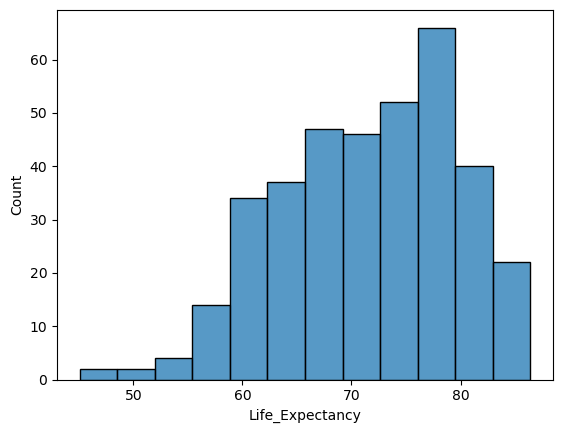

In [38]:
# plotting life expectancy ~ distribution
SNS.histplot(LE_final['Life_Expectancy'])

<Axes: >

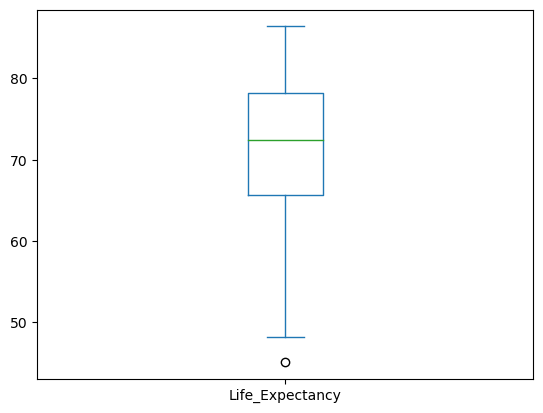

In [39]:
# plotting life expectancy
LE_final.Life_Expectancy.plot(kind = "box")

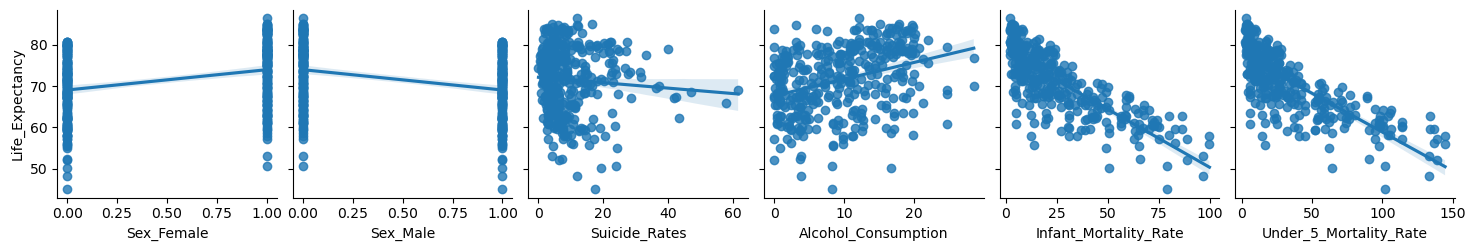

In [40]:
# visualization between life expectancy and each feature

SNS.pairplot(LE_final, x_vars = ['Sex_Female', 'Sex_Male', 'Suicide_Rates', 'Alcohol_Consumption',
                             'Infant_Mortality_Rate', 'Under_5_Mortality_Rate'], y_vars = ['Life_Expectancy'],
             kind = 'reg');

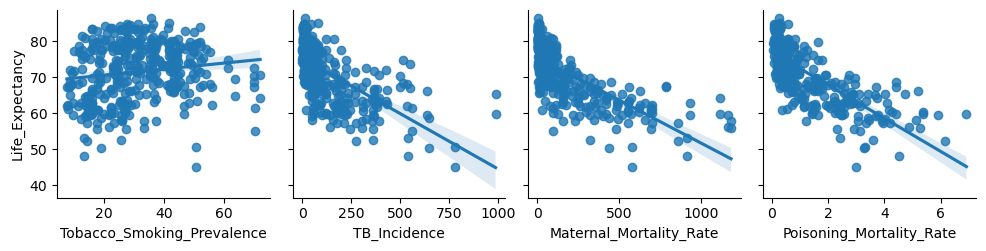

In [41]:
# visualization between life expectancy and each feature

SNS.pairplot(LE_final, x_vars = ['Tobacco_Smoking_Prevalence',
                            'TB_Incidence', 'Maternal_Mortality_Rate', 'Poisoning_Mortality_Rate' ], 
             y_vars=['Life_Expectancy'], kind = 'reg')

In [42]:
# pearson correlation coefficient 
LE_final.corr()

/var/folders/sc/0h24xp9j08nfmswx3r95q7hm0000gn/T/ipykernel_44059/1840899549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  LE_final.corr()


Year  Life_Expectancy  Suicide_Rates  \
Year                         NaN              NaN            NaN   
Life_Expectancy              NaN         1.000000      -0.072118   
Suicide_Rates                NaN        -0.072118       1.000000   
TB_Incidence                 NaN        -0.633284      -0.042208   
Maternal_Mortality_Rate      NaN        -0.723689      -0.124811   
Poisoning_Mortality_Rate     NaN        -0.756100       0.129199   
Alcohol_Consumption          NaN         0.330779       0.391624   
Infant_Mortality_Rate        NaN        -0.795636      -0.173011   
Tobacco_Smoking_Prevalence   NaN         0.144910       0.109161   
Under_5_Mortality_Rate       NaN        -0.778951      -0.162108   
Sex_Female                   NaN         0.305620      -0.508304   
Sex_Male                     NaN        -0.305620       0.508304   

                            TB_Incidence  Maternal_Mortality_Rate  \
Year                                 NaN                      NaN   
Life_Expectancy            -6.332836e-01            -7.236890e-01   
Suicide_Rates              -4.220834e-02            -1.248111e-01   
TB_Incidence                1.000000e+00             4.468070e-01   
Maternal_Mortality_Rate     4.468070e-01             1.000000e+00   
Poisoning_Mortality_Rate    4.131997e-01             7.141686e-01   
Alcohol_Consumption        -1.344919e-01            -2.861941e-01   
Infant_Mortality_Rate       5.576133e-01             8.400767e-01   
Tobacco_Smoking_Prevalence  9.855738e-02            -3.420051e-01   
Under_5_Mortality_Rate      5.198455e-01             8.668939e-01   
Sex_Female                  6.337818e-18             6.388225e-18   
Sex_Male                    2.863755e-17            -1.533174e-17   

                            Poisoning_Mortality_Rate  Alcohol_Consumption  \
Year                                             NaN                  NaN   
Life_Expectancy                            -0.756100         3.307794e-01   
Suicide_Rates                               0.129199         3.916241e-01   
TB_Incidence                                0.413200        -1.344919e-01   
Maternal_Mortality_Rate                     0.714169        -2.861941e-01   
Poisoning_Mortality_Rate                    1.000000        -2.192254e-01   
Alcohol_Consumption                        -0.219225         1.000000e+00   
Infant_Mortality_Rate                       0.673896        -4.028533e-01   
Tobacco_Smoking_Prevalence                 -0.225662         5.606952e-02   
Under_5_Mortality_Rate                      0.691572        -3.726959e-01   
Sex_Female                                 -0.225132        -5.705041e-18   
Sex_Male                                    0.225132        -2.116386e-18   

                            Infant_Mortality_Rate  Tobacco_Smoking_Prevalence  \
Year                                          NaN                         NaN   
Life_Expectancy                     -7.956363e-01                1.449103e-01   
Suicide_Rates                       -1.730108e-01                1.091613e-01   
TB_Incidence                         5.576133e-01                9.855738e-02   
Maternal_Mortality_Rate              8.400767e-01               -3.420051e-01   
Poisoning_Mortality_Rate             6.738964e-01               -2.256624e-01   
Alcohol_Consumption                 -4.028533e-01                5.606952e-02   
Infant_Mortality_Rate                1.000000e+00               -2.499311e-01   
Tobacco_Smoking_Prevalence          -2.499311e-01                1.000000e+00   
Under_5_Mortality_Rate               9.914141e-01               -2.783177e-01   
Sex_Female                           6.394296e-19                3.054364e-18   
Sex_Male                            -4.497322e-17                5.977827e-17   

                            Under_5_Mortality_Rate    Sex_Female      Sex_Male  
Year                                           NaN           NaN           NaN  
Life_Expectancy            

/var/folders/sc/0h24xp9j08nfmswx3r95q7hm0000gn/T/ipykernel_44059/3519215489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  LE_corr = LE_final.corr()


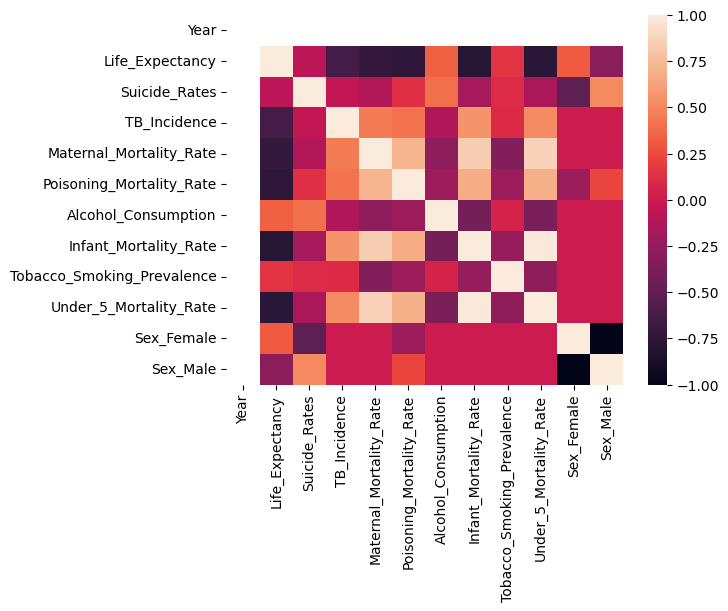

In [43]:
# heatmap to visualize which features have strong correlations to life expectancy
LE_corr = LE_final.corr()
SNS.heatmap(LE_corr);

## Building a Regression Model

In [44]:
features = LE_final.columns.drop(['Life_Expectancy','Year', 'Country', 'Sex'])
X = LE_final[features]

y = LE_final.Life_Expectancy

In [45]:
X.sample(5)

Suicide_Rates  TB_Incidence  Maternal_Mortality_Rate  \
280            3.0         156.0                    130.0   
158           18.5           7.3                      6.0   
180           11.3         182.0                    209.0   
329            2.7          16.0                     54.0   
125            2.7          99.0                     27.0   

     Poisoning_Mortality_Rate  Alcohol_Consumption  Infant_Mortality_Rate  \
280                      1.65                11.37                 29.730   
158                      0.30                19.03                  3.450   
180                      1.04                16.02                 46.590   
329                      1.21                 1.14                 22.274   
125                      0.45                15.81                 10.450   

     Tobacco_Smoking_Prevalence  Under_5_Mortality_Rate  Sex_Female  Sex_Male  
280                         9.4                  38.060           0         1  
158                        27.3                   4.030           0         1  
180                        63.8                  58.640           0         1  
329                        48.8                  26.682           1         0  
125                        55.5                  11.710           1         0

### Linear Regression

In [46]:
# steps: import, instantiate, fit, predict
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np 

In [47]:
# finding feature importance
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)

# get coefficient
pd.DataFrame({'feature':features, 'coefficient':model.coef_}).sort_values(by='coefficient')

feature  coefficient
9                    Sex_Male    -1.816896
3    Poisoning_Mortality_Rate    -1.649448
5       Infant_Mortality_Rate    -0.382043
0               Suicide_Rates    -0.034430
1                TB_Incidence    -0.011230
2     Maternal_Mortality_Rate    -0.005546
6  Tobacco_Smoking_Prevalence    -0.005364
4         Alcohol_Consumption     0.066426
7      Under_5_Mortality_Rate     0.181842
8                  Sex_Female     1.816896

Text(0.5, 0, 'Linear Regression Feature Coefficients')

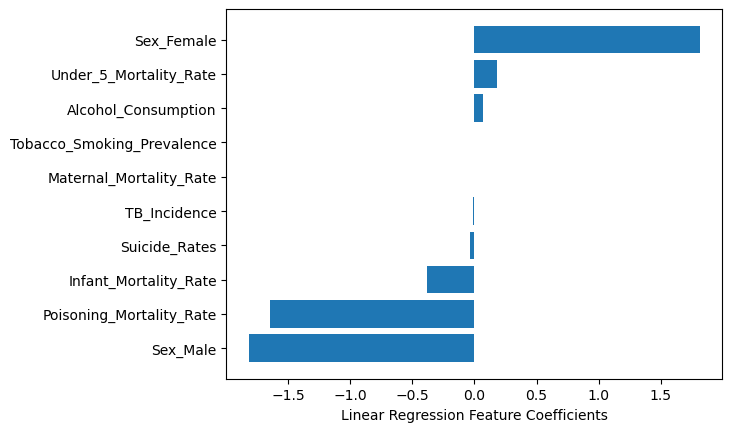

In [114]:
# plotting feature importance
sort = model.coef_.argsort()
plt.barh(features[sort], model.coef_[sort])
plt.xlabel("Linear Regression Feature Coefficients")

In [48]:
# finding which features provide the lowest RMSE

def train_test_mse(df, featurecols):
    X = df[featurecols]
    y = df.Life_Expectancy
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size = .4)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_lr_pred = lr.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_lr_pred))

In [49]:
print(train_test_mse(LE_final, ['Sex_Male','Sex_Female','Alcohol_Consumption', 'Infant_Mortality_Rate', 'Maternal_Mortality_Rate',
                                'Poisoning_Mortality_Rate', 'Suicide_Rates', 'TB_Incidence', 
                                'Tobacco_Smoking_Prevalence', 'Under_5_Mortality_Rate']))

print(train_test_mse(LE_final, ['Sex_Male', 'Sex_Female', 'Alcohol_Consumption', 'Infant_Mortality_Rate', 'Maternal_Mortality_Rate',  
                                 'Suicide_Rates', 'TB_Incidence', 'Tobacco_Smoking_Prevalence', 
                                'Under_5_Mortality_Rate']))

print(train_test_mse(LE_final, ['Sex_Female','Alcohol_Consumption','Suicide_Rates','Poisoning_Mortality_Rate','Infant_Mortality_Rate', 
                                'Maternal_Mortality_Rate', 'Under_5_Mortality_Rate', 'TB_Incidence']))

print(train_test_mse(LE_final, ['Sex_Female','Infant_Mortality_Rate', 'Maternal_Mortality_Rate', 'Under_5_Mortality_Rate']))

# model that includes all features as defined in X results in a lower RMSE

3.504043194962579
3.6382891207103203
3.5030818771331313
4.121593618054164


In [50]:
# comparing with the null root mean squared error

# add a y variable with mean 
# Create a NumPy array with the same shape as y.
y_null = np.zeros_like(y, dtype=float)

# Fill the array with the mean value of y.
y_null.fill(y.mean())

print ('null root mean squared error:', np.sqrt(metrics.mean_squared_error(y, y_null)))

# the model's RMSE is lower than the null root mean squared error, which indicates adequate model performance

null root mean squared error: 8.056712924505831


In [51]:
# scoring features with lowest RMSE 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size = .4)
    
lr = LinearRegression()
lr.fit(X_train, y_train)
    
y_lr_pred = lr.predict(X_test)
print('R Squared:', lr.score(X_test, y_test))

# 78% of the features' variability is explained by the model

R Squared: 0.7825417958959898


### Feature Regularization Using Elastic Net

In [122]:
# using elastic net to regulate the features
from sklearn.linear_model import ElasticNet

In [123]:
# comparing RMSE with regularization
def regularization(df, featurecols):
    X = df[featurecols]
    y = df.Life_Expectancy
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=573, test_size = .4)
    
    regr = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
    regr.fit(X_train, y_train)
    
    y_reg_pred = regr.predict(X_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_reg_pred))

In [124]:
print(regularization(LE_final, ['Sex_Male','Sex_Female','Alcohol_Consumption', 'Infant_Mortality_Rate', 'Maternal_Mortality_Rate',
                                'Poisoning_Mortality_Rate', 'Suicide_Rates', 'TB_Incidence', 
                                'Tobacco_Smoking_Prevalence', 'Under_5_Mortality_Rate']))

print(regularization(LE_final, ['Sex_Male', 'Sex_Female', 'Alcohol_Consumption', 'Infant_Mortality_Rate', 'Maternal_Mortality_Rate',  
                                 'Suicide_Rates', 'TB_Incidence', 'Tobacco_Smoking_Prevalence', 
                                'Under_5_Mortality_Rate']))

print(regularization(LE_final, ['Sex_Female','Alcohol_Consumption','Suicide_Rates','Poisoning_Mortality_Rate','Infant_Mortality_Rate', 
                                'Maternal_Mortality_Rate', 'Under_5_Mortality_Rate', 'TB_Incidence']))

print(regularization(LE_final, ['Sex_Female','Infant_Mortality_Rate', 'Maternal_Mortality_Rate', 'Under_5_Mortality_Rate']))


4.075408901194735
4.254993821804078
4.099064687037541
4.583803881726388


In [126]:
# determining R Squared 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size = .4)

regr = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('regularized R squared:', regr.score(X, y))
# 78% of the features' variability is explained by the model

# features' coefficients
pd.DataFrame({'feature':features, 'coefficient':regr.coef_}).sort_values(by='coefficient')

regularized R squared: 0.7839909269926818


feature  coefficient
3    Poisoning_Mortality_Rate    -0.701704
5       Infant_Mortality_Rate    -0.294216
9                    Sex_Male    -0.194488
0               Suicide_Rates    -0.178400
1                TB_Incidence    -0.011474
2     Maternal_Mortality_Rate    -0.004515
6  Tobacco_Smoking_Prevalence    -0.003370
7      Under_5_Mortality_Rate     0.084359
4         Alcohol_Consumption     0.152671
8                  Sex_Female     0.194488

Text(0.5, 0, 'Regularized Feature Coefficients')

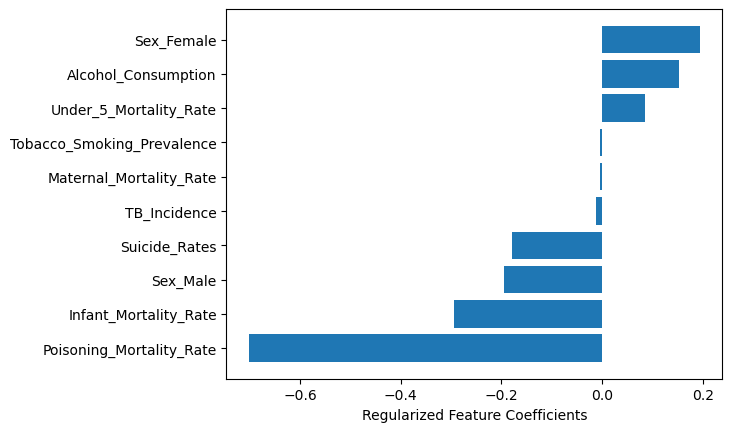

In [119]:
# plotting feature importance
sort = regr.coef_.argsort()
plt.barh(features[sort], regr.coef_[sort])
plt.xlabel("Regularized Feature Coefficients")

## K Folds Validation

In [56]:
from sklearn import model_selection

In [57]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [58]:
mse_values = []
scores = []
n = 0

for train_index, test_index in kf.split(X, y):
    Ereg = ElasticNet(alpha = 1.0, l1_ratio = 0.5).fit(X.iloc[train_index], y.iloc[train_index])
    mse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], Ereg.predict(X.iloc[test_index]))))
    scores.append(Ereg.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('RMSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("SUMMARY OF CROSS VALIDATION")
print('Mean of RMSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

Model 1
RMSE: 3.562074346782171
R2: 0.7862185498247649

Model 2
RMSE: 4.484601463847681
R2: 0.7841662004207096

Model 3
RMSE: 3.5853752210242322
R2: 0.7856365567702523

Model 4
RMSE: 3.5354340331298655
R2: 0.788608759359223

Model 5
RMSE: 3.7456195792248432
R2: 0.7863278977328267

SUMMARY OF CROSS VALIDATION
Mean of RMSE for all folds: 3.7826209288017587
Mean of R2 for all folds: 0.7861915928215553


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

### Tuning n_estimators

In [60]:
# List of values to try for n_estimators:
estimator_range = list(range(10, 200, 10))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use cross-validation with each value of n_estimators
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=7, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

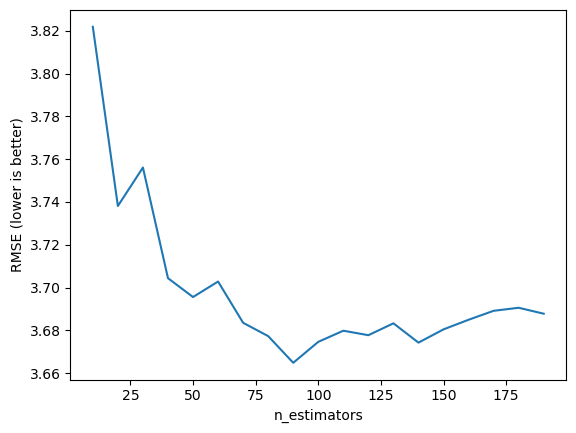

In [61]:
# Plot RMSE (y-axis) versus n_estimators (x-axis).

plt.plot(estimator_range, RMSE_scores);

plt.xlabel('n_estimators');
plt.ylabel('RMSE (lower is better)');

### Tuning Max Features

In [103]:
# List of values to try for max_features:
feature_range = list(range(1, len(features)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features.
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=90, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

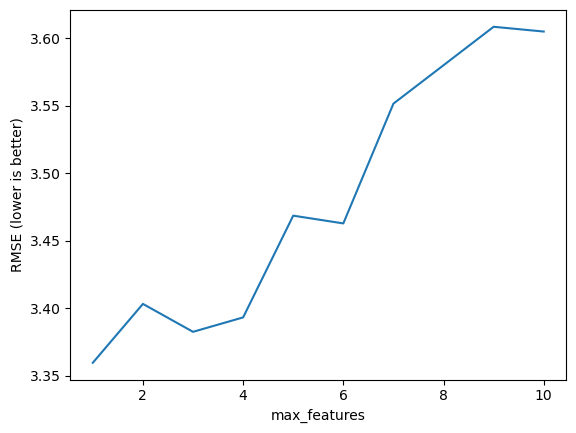

In [104]:
# Plot max_features (x-axis) versus RMSE (y-axis).

plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

### Applying n_estimators and Max Features to Random Forest Model

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=428)

In [127]:
rf = RandomForestRegressor(n_estimators=90, max_features = 3, oob_score = True, random_state=428) 
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print('random forest out of bag score:', (rf.oob_score_))

random forest out of bag score: 0.8747334710547345


In [106]:
# Find the average RMSE.
scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3.4114091555674464

In [107]:
# feature importance values 
pd.DataFrame({'feature':features, 'importance':rf.feature_importances_}).sort_values(by='importance')

feature  importance
6  Tobacco_Smoking_Prevalence    0.026315
9                    Sex_Male    0.029151
4         Alcohol_Consumption    0.030133
0               Suicide_Rates    0.032635
8                  Sex_Female    0.033826
1                TB_Incidence    0.115478
7      Under_5_Mortality_Rate    0.145364
3    Poisoning_Mortality_Rate    0.174395
5       Infant_Mortality_Rate    0.203423
2     Maternal_Mortality_Rate    0.209280

Text(0.5, 0, 'Random Forest Feature Importance')

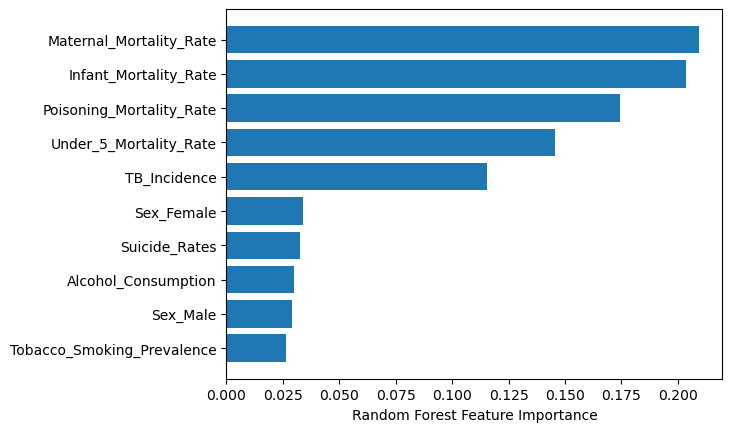

In [110]:
# plotting feature importance
sort = rf.feature_importances_.argsort()
plt.barh(features[sort], rf.feature_importances_[sort])
plt.xlabel("Random Forest Feature Importance")

##### Data Source:
https://www.kaggle.com/datasets/utkarshxy/who-worldhealth-statistics-2020-complete/?select=basicDrinkingWaterServices.csv